# Classification Assignment

Data Source https://www.kaggle.com/blastchar/telco-customer-churn

Download data from here: https://drive.google.com/file/d/1Fpt4iCGcLWCOay_elL55-oXEF1q0Mkpo/view?usp=sharing

## 1. Basic Pandas Operations

In [105]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
# Read the dataset and display the head. You will get the output as mentioned below

df = pd.read_csv('C:\\Users\\chint\\Desktop\\DATA SCIENCE FILES\\MACHINE LEARNING ASSIGNMENTS\\assignment 3\\churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [107]:
# Check the shape of the dataframe

df.shape

(7043, 21)

In [108]:
# On the dataframe apply info() function and observe the Dtypes and Missing Values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2. Cleaning the Data

In [109]:
# Observe that all these Object columns have two values - Yes and No

df.loc[:, ['Partner', 'Dependents', 'PhoneService', \
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', \
            'TechSupport', 'StreamingTV', 'StreamingMovies',\
            'PaperlessBilling', 'Churn']]

,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,Yes,No,No,No,Yes,No,No,No,No,Yes,No
1,No,No,Yes,Yes,No,Yes,No,No,No,No,No
2,No,No,Yes,Yes,Yes,No,No,No,No,Yes,Yes
3,No,No,No,Yes,No,Yes,Yes,No,No,No,No
4,No,No,Yes,No,No,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No
7039,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No
7040,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No
7041,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes


In [110]:
# Converting all the Yes to 1 and No to 0

var = ['Partner', 'Dependents', 'PhoneService', 
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
       'TechSupport', 'StreamingTV', 'StreamingMovies', 
       'PaperlessBilling', 'Churn']

for feature in var:
    df[feature] = df[feature].apply(lambda x : 1 if x=='Yes' else 0)
    
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [111]:
# Now again having a look at all those columns to see if everything went well

df.loc[:, ['Partner', 'Dependents', 'PhoneService', \
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', \
            'TechSupport', 'StreamingTV', 'StreamingMovies',\
            'PaperlessBilling', 'Churn']]

,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,1,0,0,0,1,0,0,0,0,1,0
1,0,0,1,1,0,1,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,1,1
3,0,0,0,1,0,1,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,1,1,1,1,0
7039,1,1,1,0,1,1,0,1,1,1,0
7040,1,1,0,1,0,0,0,0,0,1,0
7041,1,0,1,0,0,0,0,0,0,1,1


In [112]:
# Observe that all those columns are now converted from Object to Int64

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [113]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories

df.loc[:5, ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'TotalCharges']]

,MultipleLines,InternetService,Contract,PaymentMethod,TotalCharges
0,No phone service,DSL,Month-to-month,Electronic check,29.85
1,No,DSL,One year,Mailed check,1889.5
2,No,DSL,Month-to-month,Mailed check,108.15
3,No phone service,DSL,One year,Bank transfer (automatic),1840.75
4,No,Fiber optic,Month-to-month,Electronic check,151.65
5,Yes,Fiber optic,Month-to-month,Electronic check,820.5


In [114]:
# You can also do this to separate Object columns

df.select_dtypes(include=['object'])

,customerID,gender,MultipleLines,InternetService,Contract,PaymentMethod,TotalCharges
0,7590-VHVEG,Female,No phone service,DSL,Month-to-month,Electronic check,29.85
1,5575-GNVDE,Male,No,DSL,One year,Mailed check,1889.5
2,3668-QPYBK,Male,No,DSL,Month-to-month,Mailed check,108.15
3,7795-CFOCW,Male,No phone service,DSL,One year,Bank transfer (automatic),1840.75
4,9237-HQITU,Female,No,Fiber optic,Month-to-month,Electronic check,151.65
...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,DSL,One year,Mailed check,1990.5
7039,2234-XADUH,Female,Yes,Fiber optic,One year,Credit card (automatic),7362.9
7040,4801-JZAZL,Female,No phone service,DSL,Month-to-month,Electronic check,346.45
7041,8361-LTMKD,Male,Yes,Fiber optic,Month-to-month,Mailed check,306.6


In [115]:
# TotalCharges should be a float but it is a Object type. Lets try converting it to float64

df['TotalCharges'] = df['TotalCharges'].astype('float64')

df.info()

ValueError: could not convert string to float: ''

In [116]:
# Lets just try to see what is happening with TotalCharges. Check the output.

df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.9        8
           ..
1098.85     1
1396        1
7396.15     1
6496.15     1
5102.35     1
Name: TotalCharges, Length: 6531, dtype: int64

In [117]:
# Looking at all 11 Null Values

# df.loc[df.TotalCharges == '', :]

In [118]:
# Converting empty string in TotalCharges to NaN

df['TotalCharges'] = df['TotalCharges'].apply(lambda x : np.NaN if x==' ' else float(x))

In [119]:
# Observe the output, TotalCharges has 11 Missing values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [120]:
# Dropping customerID

df = df.drop('customerID', axis=1)

df.shape

(7043, 20)

In [121]:
# Getting all the Object Dtypes

df_categorical = df.select_dtypes(include=['object'])

df_categorical.head()

,gender,MultipleLines,InternetService,Contract,PaymentMethod
0,Female,No phone service,DSL,Month-to-month,Electronic check
1,Male,No,DSL,One year,Mailed check
2,Male,No,DSL,Month-to-month,Mailed check
3,Male,No phone service,DSL,One year,Bank transfer (automatic)
4,Female,No,Fiber optic,Month-to-month,Electronic check


In [122]:
# Encoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

df_encoded = pd.DataFrame(encoder.fit_transform(df_categorical), 
                      columns=encoder.get_feature_names(df_categorical.columns))

df_encoded.head()

,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [123]:
df.shape

(7043, 20)

In [124]:
df = pd.concat([df, df_encoded], axis=1)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,No phone service,DSL,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Male,0,0,0,34,1,No,DSL,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,Male,0,0,0,2,1,No,DSL,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Male,0,0,0,45,0,No phone service,DSL,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Female,0,0,0,2,1,No,Fiber optic,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   object 
 7   InternetService                        7043 non-null   object 
 8   OnlineSecurity                         7043 non-null   int64  
 9   OnlineBackup                           7043 non-null   int64  
 10  DeviceProtection                       7043 non-null   int64  
 11  Tech

In [126]:
df_categorical.columns

Index(['gender', 'MultipleLines', 'InternetService', 'Contract',
       'PaymentMethod'],
      dtype='object')

In [127]:
df = df.drop(df_categorical.columns, axis=1)

In [128]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,1,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,1,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,1,0,1,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   OnlineSecurity                         7043 non-null   int64  
 6   OnlineBackup                           7043 non-null   int64  
 7   DeviceProtection                       7043 non-null   int64  
 8   TechSupport                            7043 non-null   int64  
 9   StreamingTV                            7043 non-null   int64  
 10  StreamingMovies                        7043 non-null   int64  
 11  Pape

### Outliers

In [130]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [131]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,1,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,1,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,1,0,1,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [132]:
var = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[var].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
90%,69.000000,102.600000,5976.640000
95%,72.000000,107.400000,6923.590000
99%,72.000000,114.729000,8039.883000


### Missing Values

In [133]:
df.isnull().sum()

SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
TechSupport                               0
StreamingTV                               0
StreamingMovies                           0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender_Male                               0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (autom

In [134]:
df = df[~np.isnan(df['TotalCharges'])]

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   OnlineSecurity                         7032 non-null   int64  
 6   OnlineBackup                           7032 non-null   int64  
 7   DeviceProtection                       7032 non-null   int64  
 8   TechSupport                            7032 non-null   int64  
 9   StreamingTV                            7032 non-null   int64  
 10  StreamingMovies                        7032 non-null   int64  
 11  Pape

In [136]:
sum(df['Churn'])/len(df['Churn'].index)*100

26.578498293515356

In [137]:
df['Churn'].value_counts()

# Churn 'Yes' are 1

0    5163
1    1869
Name: Churn, dtype: int64

## Observe that 26.5% datapoints belong to one class rest all belongs to other class. Clearly dataset is having little imbalance.

**To Do:**
1. Read about Oversampling and Undersampling.
2. Perform undersampling.

## Train Test Split

**To Do:**
1. Sandardise the data
2. Perform 80-20 split

## Model Building - Logistic Regression

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance

## Model Building - SVM, KNN, DT, RF, etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance

In [138]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [268]:
X=df[['SeniorCitizen','Partner','Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges','gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']]
y=df[['Churn']]

In [269]:
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, y)

In [270]:
y_res.value_counts()

Churn
0        1869
1        1869
dtype: int64

In [271]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, \
                                                    y_res, \
                                                    test_size = 0.20, \
                                                   random_state = 0)

In [272]:
from sklearn import metrics

# logistic regression

Best parameters set found on train set:
{'C': 19}
LogisticRegression(C=19)

Accuracy:  0.732620320855615
######### Metrics #########
              precision    recall  f1-score   support

           0       0.75      0.70      0.72       374
           1       0.72      0.76      0.74       374

    accuracy                           0.73       748
   macro avg       0.73      0.73      0.73       748
weighted avg       0.73      0.73      0.73       748



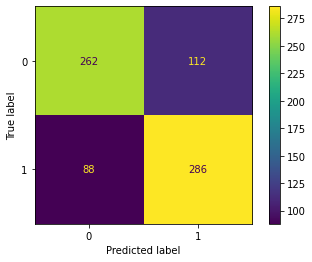

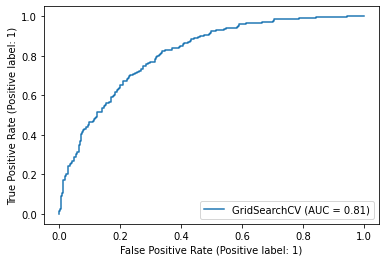

In [243]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression


parameters=[{'C':[0.1,0.2,1.0,2,3,6,8,19,35,60,10,9]}]

clf = GridSearchCV(
    LogisticRegression(), parameters, scoring='accuracy'
)
clf.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print('Accuracy: ', clf.score(X_test, y_test))

print('######### Metrics #########')

metrics.plot_confusion_matrix(clf,X_test, y_test)
metrics.plot_roc_curve(clf,X_test, y_test)

y_test_pred = clf.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

# KNN classifier

Best parameters set found on train set:
{'n_neighbors': 5, 'p': 1}
KNeighborsClassifier(p=1)

Accuracy:  0.7286096256684492
######### Metrics #########
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       374
           1       0.72      0.75      0.73       374

    accuracy                           0.73       748
   macro avg       0.73      0.73      0.73       748
weighted avg       0.73      0.73      0.73       748



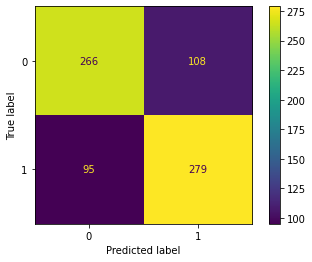

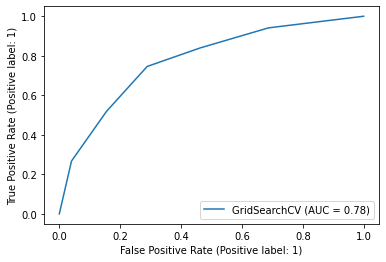

In [249]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5], 'p':[1, 2, 3]}]

clf_1 = GridSearchCV(
    KNeighborsClassifier(), tuned_parameters, scoring='accuracy'
)
clf_1.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf_1.best_params_)
print(clf_1.best_estimator_)
print()

print('Accuracy: ', clf_1.score(X_test, y_test))

print('######### Metrics #########')
metrics.plot_confusion_matrix(clf_1,X_test, y_test)

metrics.plot_roc_curve(clf_1,X_test, y_test)

y_test_pred = clf_1.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

# decision tree classifier

Best parameters set found on train set:
{'max_depth': 4, 'min_samples_leaf': 3}
DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)

Accuracy:  0.7299465240641712
######### Metrics #########
              precision    recall  f1-score   support

           0       0.78      0.64      0.70       374
           1       0.69      0.82      0.75       374

    accuracy                           0.73       748
   macro avg       0.74      0.73      0.73       748
weighted avg       0.74      0.73      0.73       748



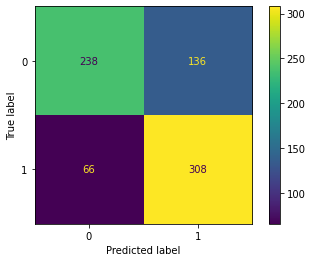

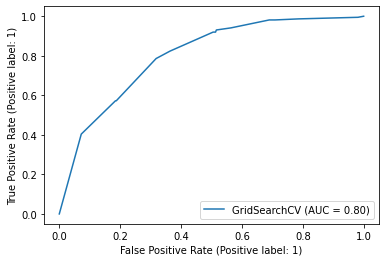

In [255]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

tuned_parameters = [{'max_depth':[1, 2, 3, 4, 5], 'min_samples_leaf':[1, 2, 3]}]

clf_2 = GridSearchCV(
    DecisionTreeClassifier(), tuned_parameters, scoring='accuracy'
)
clf_2.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf_2.best_params_)
print(clf_2.best_estimator_)
print()

print('Accuracy: ', clf_2.score(X_test, y_test))

print('######### Metrics #########')
metrics.plot_confusion_matrix(clf_2,X_test, y_test)

metrics.plot_roc_curve(clf_2,X_test, y_test)

y_test_pred = clf_2.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

# random forest classifier

Best parameters set found on train set:
{'max_depth': 4, 'min_samples_leaf': 2}
RandomForestClassifier(max_depth=4, min_samples_leaf=2)

Accuracy:  0.7433155080213903
######### Metrics #########
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       374
           1       0.71      0.82      0.76       374

    accuracy                           0.74       748
   macro avg       0.75      0.74      0.74       748
weighted avg       0.75      0.74      0.74       748



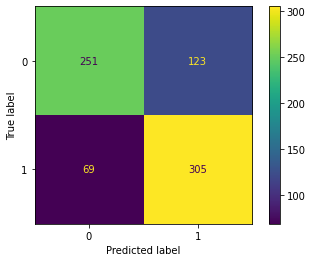

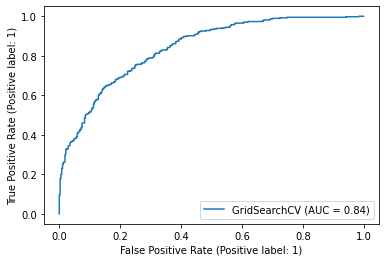

In [261]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

tuned_parameters = [{'max_depth':[1, 2, 3, 4, 5], 'min_samples_leaf':[1, 2, 3]}]

clf_3 = GridSearchCV(
    RandomForestClassifier(), tuned_parameters, scoring='accuracy'
)
clf_3.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf_3.best_params_)
print(clf_3.best_estimator_)
print()

print('Accuracy: ', clf_3.score(X_test, y_test))

print('######### Metrics #########')
metrics.plot_confusion_matrix(clf_3,X_test, y_test)

metrics.plot_roc_curve(clf_3,X_test, y_test)

y_test_pred = clf_3.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

# SVC

Best parameters set found on train set:
{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.0001)

Accuracy:  0.7259358288770054
######### Metrics #########
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       374
           1       0.71      0.82      0.76       374

    accuracy                           0.74       748
   macro avg       0.75      0.74      0.74       748
weighted avg       0.75      0.74      0.74       748



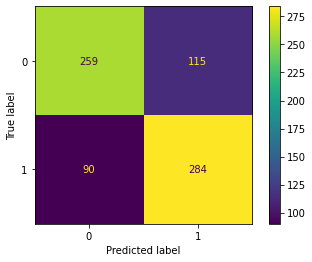

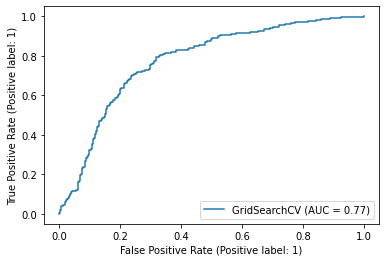

In [267]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

tuned_parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

clf_4 = GridSearchCV(
    SVC(), tuned_parameters, scoring='accuracy'
)
clf_4.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf_4.best_params_)
print(clf_4.best_estimator_)
print()

print('Accuracy: ', clf_4.score(X_test, y_test))

print('######### Metrics #########')

metrics.plot_confusion_matrix(clf_4,X_test, y_test)

metrics.plot_roc_curve(clf_4,X_test, y_test)

print(metrics.classification_report(y_test, y_test_pred))
#prediction
y_test_pred = clf_4.predict(X_test)

# voting ensemble classifier

In [275]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

estimator = []
estimator.append(('LR', 
                  LogisticRegression(solver ='lbfgs', 
                                     multi_class ='multinomial', 
                                     max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))
  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
y_pred = vot_hard.predict(X_test)
  
# using accuracy_score metric to predict accuracy
score = accuracy_score(y_test, y_pred)
print("Hard Voting Score % d" % score)
  
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, y_train)
y_pred = vot_soft.predict(X_test)
  
# using accuracy_score
score = accuracy_score(y_test, y_pred)
print("Soft Voting Score % d" % score)

Hard Voting Score  0
Soft Voting Score  0
